In [18]:
## Import Libraries

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import meanderpy as mp ## https://github.com/zsylvester/meanderpy
from importlib import reload
reload(mp)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

In [19]:
## Input Parameters

nit = 6000                   # number of iterations
W = 500.0                    # channel width (m)
D = 10.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations  
pad = 5000                    # padding (number of nodepoints along centerline)
deltas = 500.0                # sampling distance along centerline           
Cfs = 0.031 * np.ones((nit,)) # dimensionless Chezy friction factor
crdist = 2 * W               # threshold distance at which cutoffs occur
kl = 500.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 1*0.05*365*24*60*60.0*.1     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 5                # which time steps will be saved
n_bends = 15                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 0                    # time step when incision starts
t2 = 0                    # time step when lateral migration starts
t3 = 0                    # time step when aggradation starts
aggr_factor = 2e-6        # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)
print('You are running this simulation for:', dt*nit/(365.*24*60*60),'Years')
print('Migration rate constant =', kl*60.*24.*365., 'm/yr')

You are running this simulation for: 30.0 Years
Migration rate constant = 8.333333333333332 m/yr


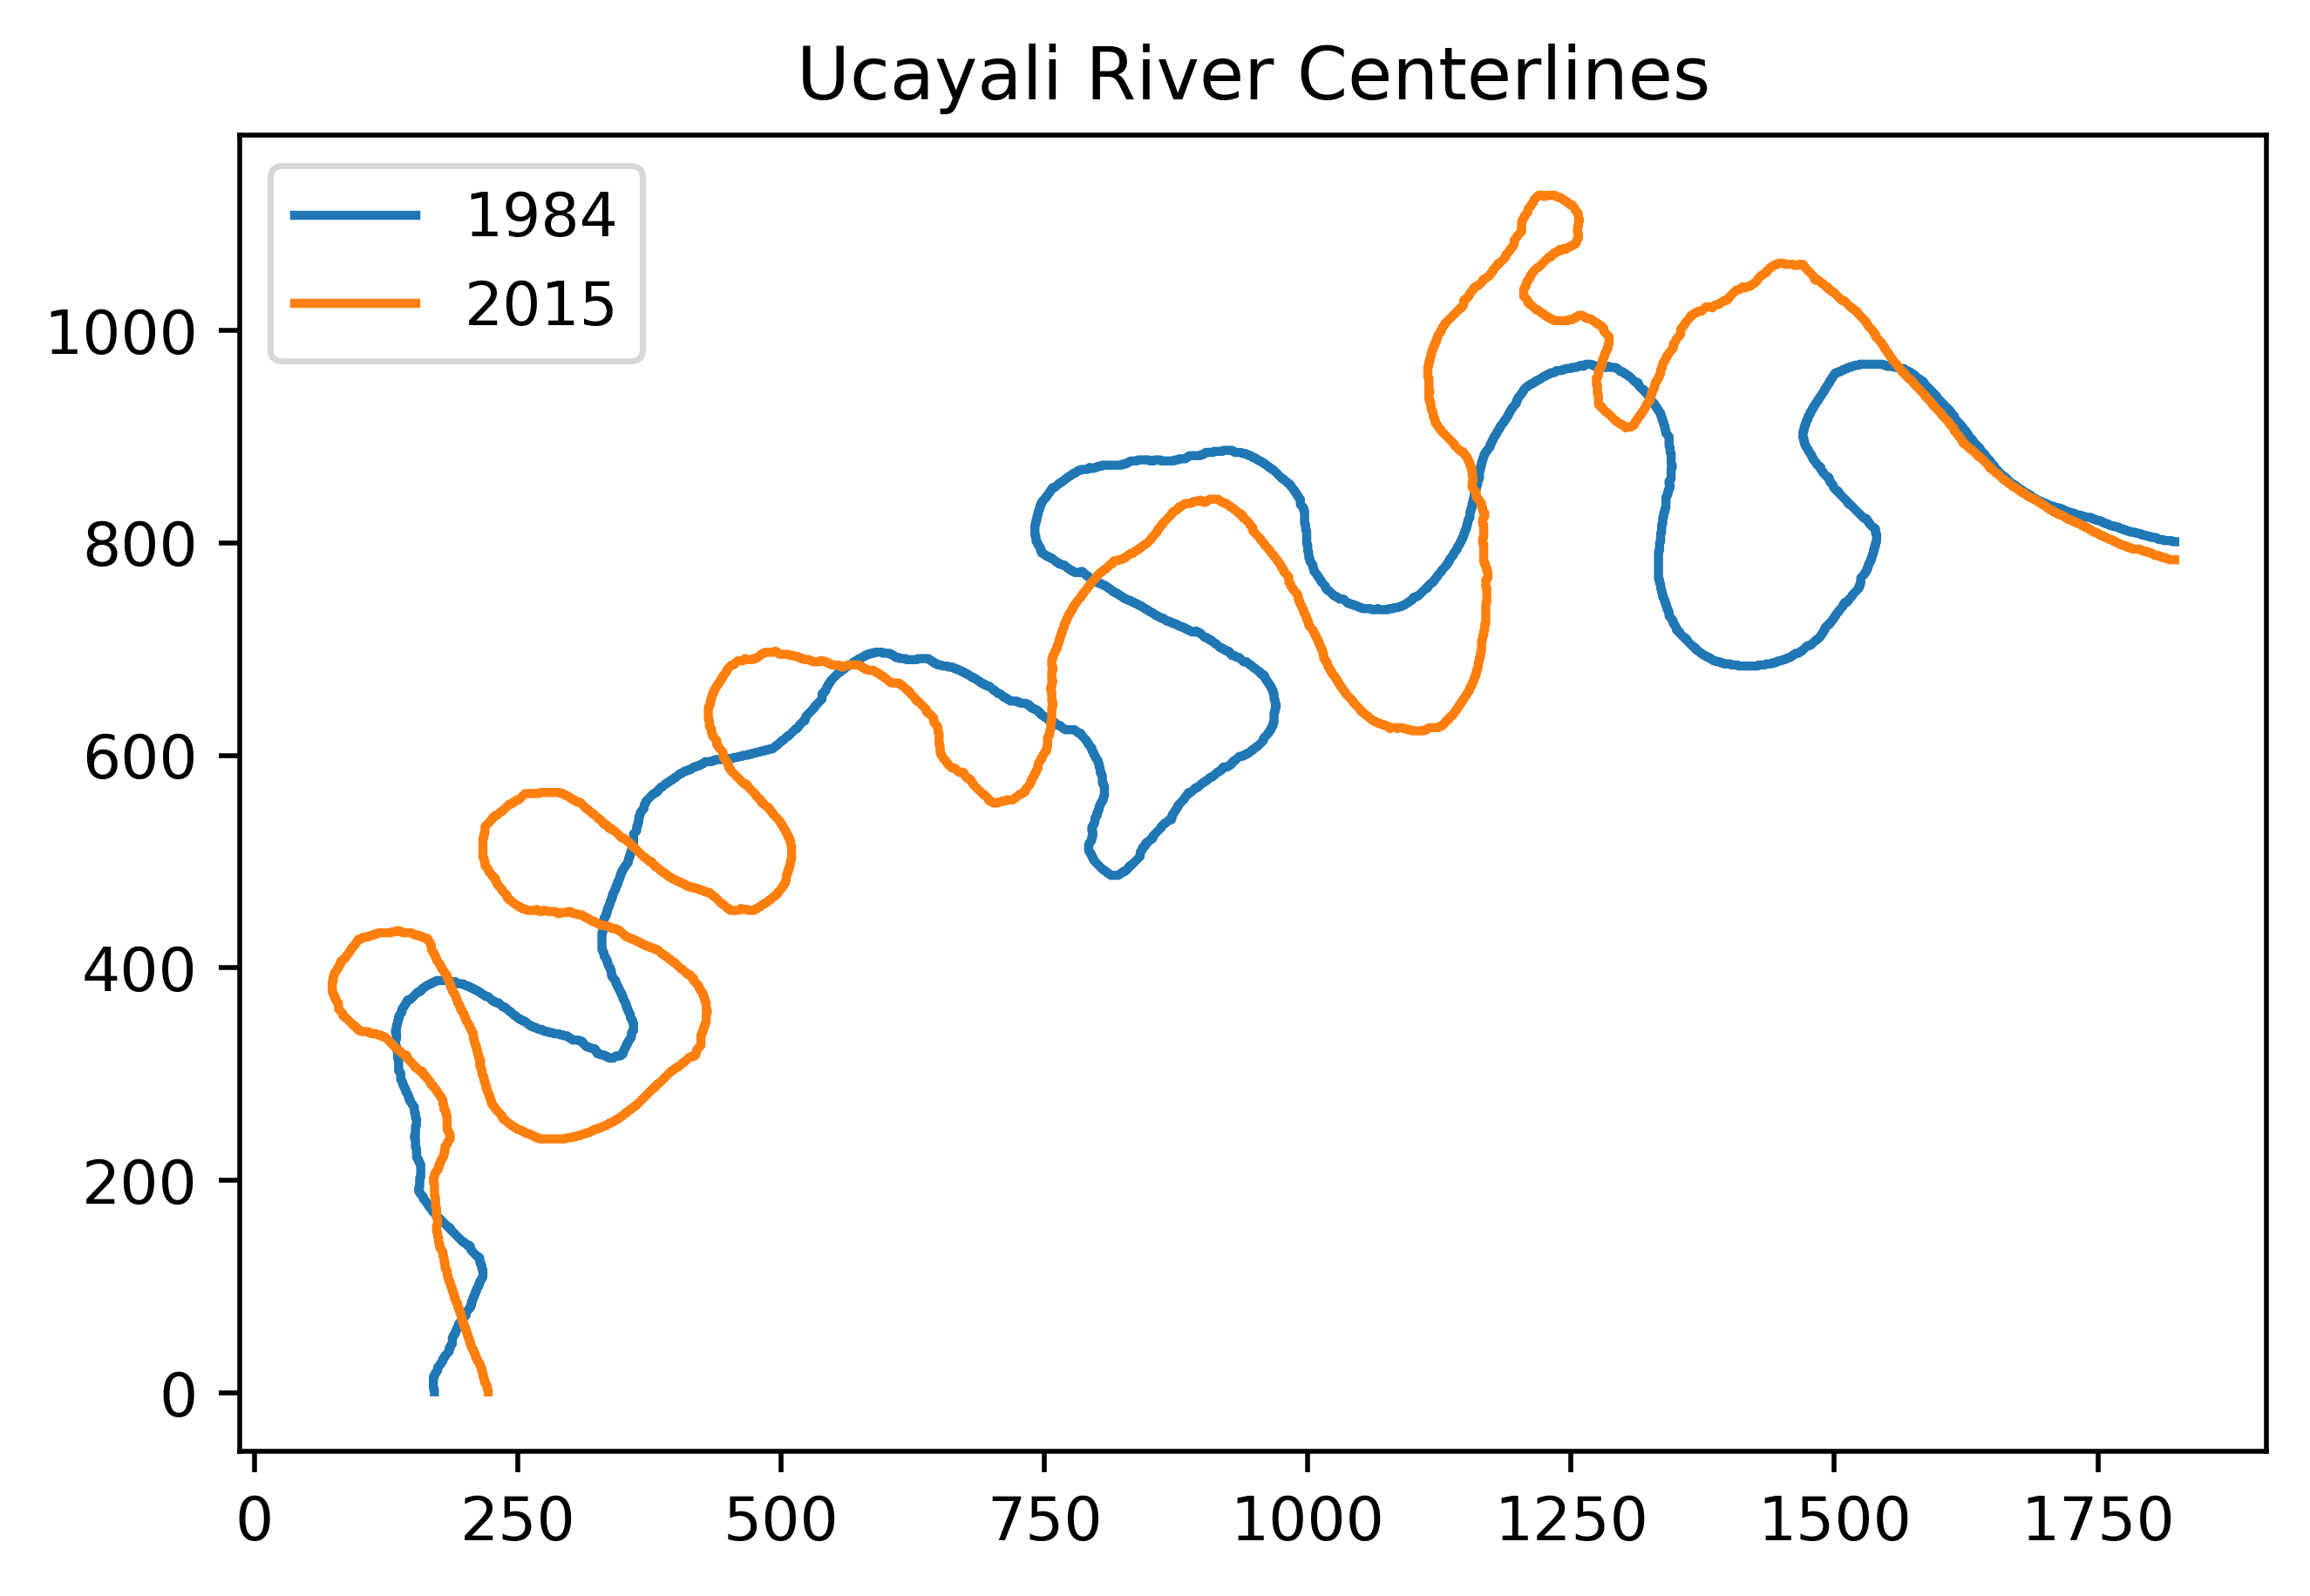

In [20]:
## Extracted Ucayali River Centerlines using Jon Schwenk's RivMAP matlab code
## https://www.mathworks.com/matlabcentral/fileexchange/58264-rivmap-river-morphodynamics-from-analysis-of-planforms

## Years: 1984-2015
## 31-year timelapse
os.chdir(r"C:\Users\Family PC\OneDrive - California Institute of Technology\river\Ucayali Centerlines")
## Extracted Ucayali River Centerlines using Jon Schwenk's RivMAP matlab code
## https://www.mathworks.com/matlabcentral/fileexchange/58264-rivmap-river-morphodynamics-from-analysis-of-planforms

## Years: 1984-2015
## 31-year timelapse

cl1=np.loadtxt('CL1.txt',delimiter=',')
cl2=np.loadtxt('CL32.txt',delimiter=',')
plt.plot(cl1[:,1],cl1[:,0],label='1984')
plt.plot(cl2[:,1],cl2[:,0],label='2015')
plt.legend()
plt.title('Ucayali River Centerlines')
plt.show()

In [21]:
## Initialize Channel

H=depths[0]
y=cl1[:,0][::-1]*10
x=cl1[:,1][::-1]*10

# y=cl2[:,0]+np.random.rand(len(cl2[:,0]))/10
# x=cl2[:,1]+np.random.rand(len(cl2[:,0]))/10
z=np.zeros(len(x))

ch=mp.Channel(x,y,z,W,H)
chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])

In [22]:
ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel


In [23]:
## Run Simulation
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat', 20, 60, chb.cl_times[-1], len(chb.channels)) # plotting

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:17<00:00, 337.60it/s]
